# **Handwritten character image classification of handwritten Byzantine characters from the 10th, 11th and 12th century.**

Task: build an image classifier to learn to detect a character given its image.


# Preprocessing

In [ ]:
#unzip the file containing the data
!unzip resources.zip

In [ ]:
# access the dataframe
import pandas as pd
data = pd.read_excel("./resources/10-12CE.data.xlsx")
data["filename"] = data["file name"].apply(lambda x: f"./resources/LT22imageclassificationtask/{x}")
data = data[["filename", "character", "century"]]
data.sample()

,filename,character,century
117,./resources/LT22imageclassificationtask/1.14.1...,δ,11


In [ ]:
# view an image
!pip install IPython
from IPython.display import Image
Image('./resources/LT22imageclassificationtask/82.36.42.png')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


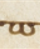

In [ ]:
# Saving the numerical form of the images, using https://pypi.org/project/opencv-python/ 
# WARNING: the following two libraries must be installed in local notebooks.
import cv2
from google.colab.patches import cv2_imshow 
images = data.filename.apply(cv2.imread)
data["image"] = images
cv2_imshow(data.sample().image.iloc[0])

In [ ]:
# Also saving the width/height of the images.
data["w"] = [i.shape[0] for i in images]
data["h"] = [i.shape[1] for i in images]

In [ ]:
# Resizing so that all images have the same shape.
resize = lambda img, w=20, h=20: cv2.resize(img, (w,h), interpolation = cv2.INTER_AREA)
data["image_resized"] = data.image.apply(resize)
cv2_imshow(data.sample().image_resized.iloc[0])

In [ ]:
# Flattening the images from tables to vectors of dimension w*h*3.
data["image_ready"] = data.image_resized.apply(lambda x, dim=20*20*3: x.reshape(dim))

# Chapter A
Meaningful data exploration and visualisation

### How many images does our dataset contain?

In [ ]:
#initialize list that contains all filenames
list_of_filenames = data["filename"].tolist()

#measure number of filenames
print("The number of images in the dataset is", len(list_of_filenames))

The number of images in the dataset is 1228


### How many of these images contain letters?



In [ ]:
letters = ['α', 'β', 'γ', 'δ', 'ε', 'ζ', 'η', 'θ', 'ι', 'κ', 'λ', 'μ', 'ν', 'ξ', 'ο', 'π', 'ρ', 'σ', 'τ', 'υ', 'φ', 'χ', 'ψ', 'ω', 'Υ', 'Ν']

list_chars = data['character'].tolist()

images_letters = []

for l in letters:
  for c in list_chars:
    if l == c:
      images_letters.append(c)

print(len(images_letters), "images contain a character that is a letter")

1068 images contain a character that is a letter


### How many of these images contain punctuation symbols?

In [ ]:
punct = ['.', ',', ';']

images_punct = []

for p in punct:
  for c in list_chars:
    if p == c:
      images_punct.append(c)

print(len(images_punct), "images contain a character that is a punctuation symbol")

14 images contain a character that is a punctuation symbol


### How many of these images show blankspace (aka character: NaN)?

In [ ]:
nan = data["character"].isnull().sum()

print(nan, "images contain empty spaces")

146 images contain empty spaces


###  How many images show the same vowel(α, ε, η, ι, ο, ω, υ)?

In [ ]:
a = data.filename[data['character']== 'α'].tolist()
print(len(a), " images contain α")

112  images contain α


In [ ]:
e = data.filename[data['character']== 'ε'].tolist()
print(len(e), " images contain ε")

99  images contain ε


In [ ]:
h = data.filename[data['character']== 'η'].tolist()
print(len(h), " images contain η")

30  images contain η


In [ ]:
i = data.filename[data['character']== 'ι'].tolist()
print(len(i), " images contain ι")

94  images contain ι


In [ ]:
o = data.filename[data['character']== 'ο'].tolist()
print(len(o), " images contain ο")

117  images contain ο


In [ ]:
w = data.filename[data['character']== 'ω'].tolist()
print(len(w), " images contain ω")

31  images contain ω


In [ ]:
u = data.filename[data['character']== 'υ'].tolist()
print(len(u), " images contain υ")

55  images contain υ


### Which images show the same consonant(β, γ, δ, ζ, θ, κ, λ, μ, ν, ξ, π, ρ, σ, τ, φ, χ, ψ);

In [ ]:
b = data.filename[data['character']== 'β'].tolist()
print(len(b), "images contain β")

7 images contain β


In [ ]:
c = data.filename[data['character']== 'γ'].tolist()
print(len(c), "images contain γ")

14 images contain γ


In [ ]:
d = data.filename[data['character']== 'δ'].tolist()
print(len(d), "images contain δ")

24 images contain δ


In [ ]:
z = data.filename[data['character']== 'ζ'].tolist()
print(len(z), "images contain ζ")

3 images contain ζ


In [ ]:
th = data.filename[data['character']== 'θ'].tolist()
print(len(th), "images contain θ")

21 images contain θ


In [ ]:
k =  data.filename[data['character']== 'κ'].tolist()
print(len(k), "images contain κ")

44 images contain κ


In [ ]:
l = data.filename[data['character']== 'λ'].tolist()
print(len(l), "images contain λ")

15 images contain λ


In [ ]:
m = data.filename[data['character']== 'μ'].tolist()
print(len(m), "images contain μ")

33 images contain μ


In [ ]:
n = data.filename[data['character']== 'ν'].tolist()
print(len(n), "images contain ν")

82 images contain ν


In [ ]:
x = data.filename[data['character']== 'ξ'].tolist()
print(len(x), "images contain ξ")

3 images contain ξ


In [ ]:
p = data.filename[data['character']== 'π'].tolist()
print(len(p), "images contain π")

43 images contain π


In [ ]:
r = data.filename[data['character']== 'ρ'].tolist()
print(len(r), "images contain ρ")

38 images contain ρ


In [ ]:
s = data.filename[data['character']== 'σ'].tolist()
print(len(s), "images contain σ")

84 images contain σ


In [ ]:
t = data.filename[data['character']== 'τ'].tolist()
print(len(t), "images contain τ")

94 images contain τ


In [ ]:
f = data.filename[data['character']== 'φ'].tolist()
print(len(f), "images contain φ")

7 images contain φ


In [ ]:
ch = data.filename[data['character']== 'χ'].tolist()
print(len(ch), "images contain χ")

9 images contain χ


In [ ]:
y = data.filename[data['character']== 'ψ'].tolist()
print(len(y), "images contain ψ")

2 images contain ψ


### Images per century

* images from 10 BC

In [ ]:
tenth_century = data.image_ready[data['century'] == 10].tolist()
len(tenth_century)

382

* images from 11 BC

In [ ]:
eleventh_century = data.image_ready[data['century'] == 11].tolist()
len(eleventh_century)

390

* images from 12 BC

In [ ]:
twelfth_century = data.image_ready[data['century'] == 12].tolist()
len(twelfth_century)

456

### Which are the most 10 frequent characters in the images?

In [ ]:
from numpy import nan
import matplotlib.pyplot as plt
from collections import Counter

#get all characters of the dataframe in a list
char_in_images = data["character"].tolist()

#count the frequency of each character using Counter
freq_d = Counter(char_in_images)

freq_d.most_common(10)

[(nan, 146),
 ('ο', 117),
 ('α', 112),
 ('ε', 99),
 ('τ', 94),
 ('ι', 94),
 ('σ', 84),
 ('ν', 82),
 ('υ', 55),
 ('κ', 44)]

### Visualizations

* Plot the frequency of vowels in the dataset

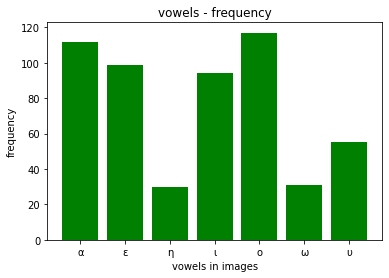

In [ ]:
vowels = ['α', 'ε', 'η', 'ι', 'ο', 'ω', 'υ']
freq_v = [ 112, 99, 30, 94, 117, 31, 55]

plt.bar(vowels, freq_v, color='g')
plt.xlabel('vowels in images')
plt.ylabel('frequency')
plt.title('vowels - frequency')
plt.show()

* Plot the frequency of consonants in the dataset

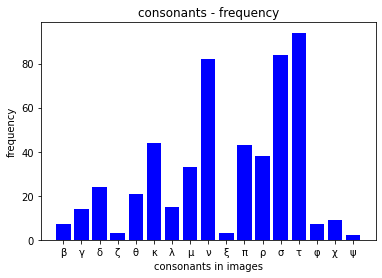

In [ ]:
consonants = ['β', 'γ', 'δ', 'ζ', 'θ', 'κ', 'λ', 'μ', 'ν', 'ξ', 'π', 'ρ', 'σ', 'τ', 'φ', 'χ', 'ψ']
freq_c = [7, 14, 24, 3, 21, 44, 15, 33, 82, 3, 43, 38, 84, 94, 7, 9, 2]

plt.bar(consonants, freq_c, color='b')
plt.xlabel('consonants in images')
plt.ylabel('frequency')
plt.title('consonants - frequency')
plt.show()

* Plot the frequency of the centuries in the data.

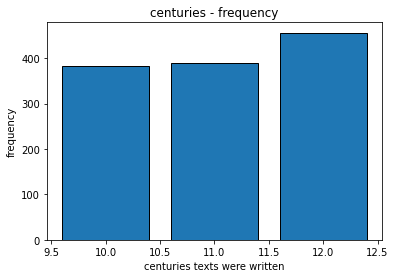

In [ ]:
#get values from 'century' column to list
list_of_centuries = data['century'].tolist()

#get list containing lists of the frequency each value has in the 'century' column
freq_list = pd.Series(list_of_centuries).value_counts().reset_index().values.tolist()

centuries = [] #will contain all centuries, used as X in the plot
frequencies = [] #will contain all frequency values, used as Y in the plot

#In every list contained in the freq_list, the 1st value is the century and the 2nd value is the frequency each century has in the dataframe.
for lists in freq_list:
  centuries.append(lists[0])
  frequencies.append(lists[1])

#create the plot    
plt.bar(centuries, frequencies, edgecolor='black')
plt.xlabel('centuries texts were written')
plt.ylabel('frequency')
plt.title('centuries - frequency')
plt.show()

# Chapter B
Fair comparison of three or more sklearn classifiers, using appropriate evaluation metrics. Use cross-validation with random and century-based folds. Century-based means training on the 10th and 11th, then assessing on the 12th; training on the 11th and 12th, then assess on the 10th; training on the 10th and 12th, then assessing on the 11th. Two simple baselines should also be designed, implemented and evaluated.

## Baseline models for random folds

### **Dummy Classifier**

In [ ]:
X = tenth_century + eleventh_century + twelfth_century
y = data.character[data.century == 10].tolist() + data.character[data.century == 11].tolist() + data.character[data.century == 12].tolist()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 12)

In [ ]:
from sklearn.dummy import DummyClassifier
dcl = DummyClassifier(strategy= "most_frequent") #“most_frequent”: the predict method always returns the most frequent class label in the observed y argument passed to fit.

In [ ]:
dcl.fit(X_train, y_train)
dcl.score(X_test, y_test)

0.11382113821138211

## Random folds






###  **Decision Tree Classifier**




* Train & Test split (Holdout Validation)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 12)
model = DecisionTreeClassifier()
train_data = model.fit(X_train, y_train)

In [ ]:
test_data = model.score(X_test, y_test)
test_data

0.3712737127371274




* Stratified K-Fold Cross Validation (appropriate for imbalanced datasets, it doesn't make random sampling)




In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
skf = StratifiedKFold(n_splits=5, shuffle=True)
model = DecisionTreeClassifier()
cv_results = cross_val_score(model, X_test, y_test, cv=skf)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


In [ ]:
import numpy as np
print(np.mean(cv_results))

0.3135357557657209


### **KNN (K-Nearest Neighbour)** 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn.score(X_test, y_test)

0.5203252032520326

* cross validation score

In [ ]:
cv_results = cross_val_score(knn, X_test, y_test, cv=skf)
print(np.mean(cv_results))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


0.5521022067363531


### **Random Forest Classifier** (best results)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

rfc = RandomForestClassifier(n_estimators=350, max_features="log2")
rfc.fit(X_train,y_train)

RandomForestClassifier(max_features='log2', n_estimators=350)

In [ ]:
rfc.score(X_test, y_test)

0.5826558265582655

* cross validation score

In [ ]:
skf = StratifiedKFold(n_splits= 10, shuffle=True)
cv_results = cross_val_score(rfc, X_test, y_test, cv=skf)
print(np.mean(cv_results))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,


0.572444355591097


## Baseline models for century-based folds

### **Dummy Classifier**

* testing the 12th century

In [ ]:
X_train = data.image_ready[data.century!= 12].to_list()
y_train = data.character[data.century!= 12].to_list()
X_test = data.image_ready[data.century== 12].to_list()
y_test = data.character[data.century== 12].to_list()

In [ ]:
dcl = DummyClassifier(strategy= "most_frequent")
dcl.fit(X, y)
dcl.score(X_test, y_test)

0.12719298245614036

* testing the 11th century

In [ ]:
X_train = data.image_ready[data.century!= 11].to_list()
y_train = data.character[data.century!= 11].to_list()
X_test = data.image_ready[data.century== 11].to_list()
y_test = data.character[data.century== 11].to_list()

In [ ]:
dcl = DummyClassifier(strategy= "most_frequent")
dcl.fit(X, y)
dcl.score(X_test, y_test)

0.10256410256410256

* testing the 10th century

In [ ]:
X_train = data.image_ready[data.century!= 10].to_list()
y_train = data.character[data.century!= 10].to_list()
X_test = data.image_ready[data.century== 10].to_list()
y_test = data.character[data.century== 10].to_list()

In [ ]:
dcl = DummyClassifier(strategy= "most_frequent")
dcl.fit(X, y)
dcl.score(X_test, y_test)

0.1256544502617801

## Century-based folds

### **Decision Tree Classisfier**

* Training with data from 10th & 11th century, testing with 12th century

In [ ]:
X_train = data.image_ready[data.century!= 12].to_list()
y_train = data.character[data.century!= 12].to_list()
X_test = data.image_ready[data.century== 12].to_list()
y_test = data.character[data.century== 12].to_list()

In [ ]:
model = DecisionTreeClassifier()
train_data = model.fit(X_train, y_train)
test_data = model.score(X_test, y_test)
test_data

0.125

In [ ]:
#cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True)
cv_results = cross_val_score(model, X_test, y_test, cv=skf)
print(np.mean(cv_results))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


0.3200066368010619


* Training with data from 10th & 12th century, testing with 11th century



In [ ]:
X_train = data.image_ready[data.century!= 11].to_list()
y_train = data.character[data.century!= 11].to_list()
X_test = data.image_ready[data.century== 11].to_list()
y_test = data.character[data.century== 11].to_list()

In [ ]:
model = DecisionTreeClassifier()
train_data = model.fit(X_train, y_train)
test_data = model.score(X_test, y_test)
test_data

0.2794871794871795

In [ ]:
#cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True)
cv_results = cross_val_score(model, X_test, y_test, cv=skf)
print(np.mean(cv_results))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


0.3444201095072176


* Training with data from 11th & 12th century, testing with 10th century



In [ ]:
X_train = data.image_ready[data.century!= 10].to_list()
y_train = data.character[data.century!= 10].to_list()
X_test = data.image_ready[data.century== 10].to_list()
y_test = data.character[data.century== 10].to_list()

In [ ]:
model = DecisionTreeClassifier()
train_data = model.fit(X_train, y_train)
test_data = model.score(X_test, y_test)
test_data

0.2923076923076923

In [ ]:
#cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True)
cv_results = cross_val_score(model, X_test, y_test, cv=skf)
print(np.mean(cv_results))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


0.3372059067529451


### **KNN Classifier**

* Training with data from 10th & 11th century, testing with 12th century

In [ ]:
X_train = data.image_ready[data.century!= 12].to_list()
y_train = data.character[data.century!= 12].to_list()
X_test = data.image_ready[data.century== 12].to_list()
y_test = data.character[data.century== 12].to_list()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.26973684210526316

In [ ]:
#cross-validation
skf = StratifiedKFold(n_splits = 10, shuffle=True)
cv_results = cross_val_score(knn, X_test, y_test, cv=skf)
print(np.mean(cv_results))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,


0.5707450353192056


* Training with data from 10th & 12th century, testing with 11th century

In [ ]:
X_train = data.image_ready[data.century!= 11].to_list()
y_train = data.character[data.century!= 11].to_list()
X_test = data.image_ready[data.century== 11].to_list()
y_test = data.character[data.century== 11].to_list()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.5

In [ ]:
#cross-validation
skf = StratifiedKFold(n_splits=10, shuffle=True)
cv_results = cross_val_score(knn, X_test, y_test, cv=skf)
print(np.mean(cv_results))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,


0.5749033719845396


* Training with data from 11th & 12th century, testing with 10th century

In [ ]:
X_train = data.image_ready[data.century!= 10].to_list()
y_train = data.character[data.century!= 10].to_list()
X_test = data.image_ready[data.century== 10].to_list()
y_test = data.character[data.century== 10].to_list()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.306282722513089

In [ ]:
#cross-validation
skf = StratifiedKFold(n_splits=10, shuffle=True)
cv_results = cross_val_score(knn, X_test, y_test, cv=skf)
print(np.mean(cv_results))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,


0.5668066106890577


### **Random Forest Classifier** (best results - testing 11th century)

* Training with data from 10th & 11th century, testing with 12th century

In [ ]:
X_train = data.image_ready[data.century!= 12].to_list()
y_train = data.character[data.century!= 12].to_list()
X_test = data.image_ready[data.century== 12].to_list()
y_test = data.character[data.century== 12].to_list()

In [ ]:
rfc = RandomForestClassifier(n_estimators=300)
rfc.fit(X_train,y_train)
rfc.score(X_test, y_test)

0.19736842105263158

In [ ]:
#cross-validation
skf = StratifiedKFold(n_splits = 10, shuffle=True)
cv_results = cross_val_score(rfc, X_test, y_test, cv=skf)
print(np.mean(cv_results))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,


0.5806810609089699


* Training with data from 10th & 12th century, testing with 11th century

In [ ]:
X_train = data.image_ready[data.century!= 11].to_list()
y_train = data.character[data.century!= 11].to_list()
X_test = data.image_ready[data.century== 11].to_list()
y_test = data.character[data.century== 11].to_list()

In [ ]:
rfc = RandomForestClassifier(n_estimators=300)
rfc.fit(X_train,y_train)
rfc.score(X_test, y_test)

0.5025641025641026

In [ ]:
#cross-validation
skf = StratifiedKFold(n_splits = 10, shuffle=True)
cv_results = cross_val_score(rfc, X_test, y_test, cv=skf)
print(np.mean(cv_results))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,


0.5895841663334667


* Training with data from 11th & 12th century, testing with 10th century

In [ ]:
X_train = data.image_ready[data.century!= 10].to_list()
y_train = data.character[data.century!= 10].to_list()
X_test = data.image_ready[data.century== 10].to_list()
y_test = data.character[data.century== 10].to_list()

In [ ]:
rfc = RandomForestClassifier(n_estimators=300)
rfc.fit(X_train,y_train)
rfc.score(X_test, y_test)

0.38481675392670156

In [ ]:
#cross-validation
skf = StratifiedKFold(n_splits = 10, shuffle=True)
cv_results = cross_val_score(rfc, X_test, y_test, cv=skf)
print(np.mean(cv_results))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,


0.5814474210315874


# Chapter C
Error analysis

I am doing the error analysis by printing the classification report and cretaing a new dataframe with 2 columns, the "y_test" column which has the original data of the dataframe and a column with the model predictions. This way we can see what kind of mistakes occured during the machine lerning process.

## Random folds

In [ ]:
X = tenth_century + eleventh_century + twelfth_century
y = data.character[data.century == 10].tolist() + data.character[data.century == 11].tolist() + data.character[data.century == 12].tolist()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 12)

### Decision Tree Classifier

Let's take a look at what this model predicted and whether it is correct.

In [ ]:
model.fit(X_train,y_train)
predicted = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           ,       0.00      0.00      0.00         1
           .       0.50      0.20      0.29         5
           ;       0.00      0.00      0.00         1
         nan       0.81      0.83      0.82        42
           Ν       0.00      0.00      0.00         0
           Υ       0.00      0.00      0.00         1
           α       0.49      0.42      0.45        43
           β       0.00      0.00      0.00         2
           γ       0.00      0.00      0.00         4
           δ       0.00      0.00      0.00         8
           ε       0.15      0.19      0.17        27
           ζ       0.00      0.00      0.00         1
           η       0.12      0.29      0.17         7
           θ       1.00      0.17      0.29         6
           ι       0.61      0.57      0.59        30
           κ       0.19      0.23      0.21        13
           λ       0.00      0.00      0.00         3
           μ       0.09    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

In [ ]:
dtc = pd.DataFrame(y_test, columns=['y_test'])
dtc['DTC_prediction']=predicted
dtc

,y_test,DTC_prediction
0,ι,ω
1,ω,ε
2,NaN,nan
3,ζ,σ
4,NaN,nan
...,...,...
364,ο,σ
365,NaN,nan
366,ε,α
367,ε,ε


### KNN Classifier

In [ ]:
print(classification_report(y_test, knn.predict(X_test)))

              precision    recall  f1-score   support

           ,       0.00      0.00      0.00         1
           .       0.00      0.00      0.00         5
           ;       0.00      0.00      0.00         1
         nan       0.54      0.95      0.69        42
           Ν       0.00      0.00      0.00         0
           Υ       0.33      1.00      0.50         1
           α       0.54      0.65      0.59        43
           β       0.00      0.00      0.00         2
           γ       0.50      0.75      0.60         4
           δ       1.00      0.38      0.55         8
           ε       0.50      0.33      0.40        27
           ζ       0.00      0.00      0.00         1
           η       0.75      0.43      0.55         7
           θ       0.50      0.17      0.25         6
           ι       0.42      0.60      0.49        30
           κ       0.80      0.62      0.70        13
           λ       0.33      0.33      0.33         3
           μ       0.33    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

In [ ]:
knn.fit(X_train, y_train)
predicted_knn = knn.predict(X_test)
kcl = pd.DataFrame(y_test, columns=['y_test'])
kcl['KNN_prediction']=predicted_knn
kcl

,y_test,KNN_prediction
0,ι,Υ
1,ω,ε
2,NaN,nan
3,ζ,nan
4,NaN,nan
...,...,...
364,ο,ο
365,NaN,nan
366,ε,nan
367,ε,ε


### Random Forest Classifier

In [ ]:
print(classification_report(y_test, rfc.predict(X_test)))

              precision    recall  f1-score   support

           ,       0.00      0.00      0.00         1
           .       0.00      0.00      0.00         5
           ;       0.00      0.00      0.00         1
         nan       0.72      1.00      0.84        42
           Υ       0.00      0.00      0.00         1
           α       0.53      0.74      0.62        43
           β       0.00      0.00      0.00         2
           γ       1.00      0.50      0.67         4
           δ       0.50      0.12      0.20         8
           ε       0.45      0.56      0.50        27
           ζ       0.00      0.00      0.00         1
           η       0.75      0.43      0.55         7
           θ       1.00      0.17      0.29         6
           ι       0.60      0.83      0.69        30
           κ       0.75      0.23      0.35        13
           λ       1.00      0.33      0.50         3
           μ       0.75      0.27      0.40        11
           ν       0.60    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
rfc.fit(X_train, y_train)
predicted_rfc = rfc.predict(X_test)
rcl = pd.DataFrame(y_test, columns=['y_test'])
rcl['RFC_prediction']=predicted_rfc
rcl

,y_test,RFC_prediction
0,ι,ι
1,ω,ε
2,NaN,nan
3,ζ,ν
4,NaN,nan
...,...,...
364,ο,ο
365,NaN,nan
366,ε,ε
367,ε,ε


### Conclusion

In my opinion the main problem is that the **dataset** is **imbalanced** and many characters are under-represented. For example β: 7, ζ: 3, λ:13, ξ: 3, φ: 7, ψ: 2, χ:9, punctuation symbols: 14. 

* **Decision Tree Classifier:** 
1. ',' (precision: 0.00 ,recall: 0.00)
2. '.' (precision: 0.00 ,recall: 0.00)
3. ';' (precision: 0.00 ,recall: 0.00)
4. 'β' (precision: 0.00 ,recall: 0.00) 
5. 'ζ' (precision: 0.00 ,recall: 0.00)
6. 'λ' (precision: 0.00 ,recall: 0.00)
7. 'φ' (precision: 0.00 ,recall: 0.00)


* **KNN:**
1. ',' (precision: 0.00 ,recall: 0.00)
2. '.' (precision: 0.00 ,recall: 0.00)
3. ';' (precision: 0.00 ,recall: 0.00)
4. 'β' (precision: 0.00 ,recall: 0.00)
5. 'ζ' (precision: 0.00 ,recall: 0.00)
6. 'χ' (precision: 0.00 ,recall: 0.00)

* **Random Forest**
1. ',' (precision: 0.00 ,recall: 0.00)
2. '.' (precision: 0.00 ,recall: 0.00)
3. ';' (precision: 0.00 ,recall: 0.00)
4. 'β' (precision: 0.00 ,recall: 0.00)
5. 'ζ' (precision: 0.00 ,recall: 0.00)
6. 'φ' (precision: 0.00 ,recall: 0.00)
6. 'χ' (precision: 0.00 ,recall: 0.00)

We see the same characters being missclassified in different models and being confused with the more frequent characters (e.g. 'α', 'τ', 'nan').



## Century-based folds

### 12th century

In [ ]:
X_train = data.image_ready[data.century!= 12].to_list()
y_train = data.character[data.century!= 12].to_list()
X_test = data.image_ready[data.century== 12].to_list()
y_test = data.character[data.century== 12].to_list()

* Decision Tree Classifier

In [ ]:
model.fit(X_train,y_train)
predicted = model.predict(X_test)
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           ,       0.00      0.00      0.00         1
           .       0.00      0.00      0.00         3
         nan       0.62      0.22      0.33        58
           Ν       0.00      0.00      0.00         3
           Υ       0.00      0.00      0.00         4
           α       0.36      0.21      0.26        48
           β       0.00      0.00      0.00         2
           γ       0.00      0.00      0.00         4
           δ       0.25      0.43      0.32         7
           ε       0.04      0.08      0.05        38
           ζ       0.00      0.00      0.00         1
           η       0.00      0.00      0.00        10
           θ       0.00      0.00      0.00        10
           ι       0.26      0.33      0.29        33
           κ       0.25      0.14      0.18        14
           λ       0.00      0.00      0.00         6
           μ       0.00      0.00      0.00        15
           ν       0.31    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
dtc = pd.DataFrame(y_test, columns=['y_test'])
dtc['DTC_prediction']=predicted
dtc

,y_test,DTC_prediction
0,π,ν
1,ρ,ε
2,α,α
3,τ,ε
4,τ,σ
...,...,...
451,NaN,σ
452,σ,ρ
453,π,σ
454,ρ,η


* KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
print(classification_report(y_test, knn.predict(X_test)))

              precision    recall  f1-score   support

           ,       0.00      0.00      0.00         1
           .       0.00      0.00      0.00         3
         nan       0.84      0.84      0.84        58
           Ν       0.00      0.00      0.00         3
           Υ       0.00      0.00      0.00         4
           α       0.18      0.54      0.27        48
           β       0.00      0.00      0.00         2
           γ       0.50      0.25      0.33         4
           δ       0.14      0.14      0.14         7
           ε       0.10      0.13      0.12        38
           ζ       0.00      0.00      0.00         1
           η       0.00      0.00      0.00        10
           θ       0.29      0.20      0.24        10
           ι       0.26      0.30      0.28        33
           κ       0.40      0.14      0.21        14
           λ       1.00      0.33      0.50         6
           μ       0.30      0.20      0.24        15
           ν       0.50    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
predicted_knn = knn.predict(X_test)
kcl = pd.DataFrame(y_test, columns=['y_test'])
kcl['KNN_prediction']=predicted_knn
kcl

,y_test,KNN_prediction
0,π,α
1,ρ,α
2,α,α
3,τ,θ
4,τ,α
...,...,...
451,NaN,nan
452,σ,α
453,π,α
454,ρ,ρ


* Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=300)
rfc.fit(X_train,y_train)
print(classification_report(y_test, rfc.predict(X_test)))

              precision    recall  f1-score   support

           ,       0.00      0.00      0.00         1
           .       0.00      0.00      0.00         3
         nan       0.84      0.84      0.84        58
           Ν       0.00      0.00      0.00         3
           Υ       0.00      0.00      0.00         4
           α       0.18      0.54      0.27        48
           β       0.00      0.00      0.00         2
           γ       0.50      0.25      0.33         4
           δ       0.14      0.14      0.14         7
           ε       0.10      0.13      0.12        38
           ζ       0.00      0.00      0.00         1
           η       0.00      0.00      0.00        10
           θ       0.29      0.20      0.24        10
           ι       0.26      0.30      0.28        33
           κ       0.40      0.14      0.21        14
           λ       1.00      0.33      0.50         6
           μ       0.30      0.20      0.24        15
           ν       0.50    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
predicted_rfc = rfc.predict(X_test)
rcl = pd.DataFrame(y_test, columns=['y_test'])
rcl['RFC_prediction']=predicted_rfc
rcl

,y_test,RFC_prediction
0,π,ι
1,ρ,ρ
2,α,ι
3,τ,σ
4,τ,σ
...,...,...
451,NaN,nan
452,σ,σ
453,π,σ
454,ρ,ι


### 11th century

In [ ]:
X_train = data.image_ready[data.century!= 11].to_list()
y_train = data.character[data.century!= 11].to_list()
X_test = data.image_ready[data.century== 11].to_list()
y_test = data.character[data.century== 11].to_list()

* Decision Tree Classifier

In [ ]:
model.fit(X_train,y_train)
predicted = model.predict(X_test)
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           ,       0.00      0.00      0.00         2
           .       0.12      0.50      0.20         2
         nan       0.77      0.90      0.83        40
           Ν       0.00      0.00      0.00         0
           Υ       0.00      0.00      0.00         0
           α       0.12      0.09      0.10        32
           β       0.00      0.00      0.00         4
           γ       0.25      0.20      0.22         5
           δ       0.00      0.00      0.00         9
           ε       0.15      0.17      0.16        30
           ζ       0.00      0.00      0.00         1
           η       0.00      0.00      0.00         4
           θ       0.00      0.00      0.00         7
           ι       0.32      0.24      0.28        41
           κ       0.17      0.07      0.10        15
           λ       0.00      0.00      0.00         7
           μ       0.38      0.55      0.44        11
           ν       0.43    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

In [ ]:
dtc = pd.DataFrame(y_test, columns=['y_test'])
dtc['DTC_prediction']=predicted
dtc

,y_test,DTC_prediction
0,λ,ε
1,ο,ι
2,τ,ε
3,ρ,ι
4,ι,ι
...,...,...
385,κ,χ
386,α,ι
387,θ,ο
388,ι,ι


* KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
print(classification_report(y_test, knn.predict(X_test)))

              precision    recall  f1-score   support

           ,       0.00      0.00      0.00         2
           .       0.00      0.00      0.00         2
         nan       0.45      0.97      0.61        40
           α       0.39      0.69      0.50        32
           β       0.00      0.00      0.00         4
           γ       0.50      0.60      0.55         5
           δ       1.00      0.33      0.50         9
           ε       0.53      0.30      0.38        30
           ζ       0.00      0.00      0.00         1
           η       0.25      0.50      0.33         4
           θ       0.67      0.29      0.40         7
           ι       0.68      0.66      0.67        41
           κ       1.00      0.20      0.33        15
           λ       0.00      0.00      0.00         7
           μ       0.50      0.64      0.56        11
           ν       0.40      0.76      0.52        25
           ξ       0.00      0.00      0.00         1
           ο       0.55    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
predicted_knn = knn.predict(X_test)
kcl = pd.DataFrame(y_test, columns=['y_test'])
kcl['KNN_prediction']=predicted_knn
kcl

,y_test,KNN_prediction
0,λ,α
1,ο,ο
2,τ,σ
3,ρ,α
4,ι,ι
...,...,...
385,κ,υ
386,α,nan
387,θ,α
388,ι,υ


* Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=300)
rfc.fit(X_train,y_train)
print(classification_report(y_test, rfc.predict(X_test)))

              precision    recall  f1-score   support

           ,       0.00      0.00      0.00         2
           .       0.00      0.00      0.00         2
         nan       0.75      1.00      0.86        40
           α       0.30      0.75      0.43        32
           β       0.00      0.00      0.00         4
           γ       1.00      0.20      0.33         5
           δ       0.00      0.00      0.00         9
           ε       0.38      0.47      0.42        30
           ζ       0.00      0.00      0.00         1
           η       0.00      0.00      0.00         4
           θ       0.00      0.00      0.00         7
           ι       0.68      0.73      0.71        41
           κ       1.00      0.13      0.24        15
           λ       0.00      0.00      0.00         7
           μ       1.00      0.18      0.31        11
           ν       0.41      0.96      0.57        25
           ξ       0.00      0.00      0.00         1
           ο       0.55    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
predicted_rfc = rfc.predict(X_test)
rcl = pd.DataFrame(y_test, columns=['y_test'])
rcl['RFC_prediction']=predicted_rfc
rcl

,y_test,RFC_prediction
0,λ,α
1,ο,ο
2,τ,υ
3,ρ,ν
4,ι,ι
...,...,...
385,κ,υ
386,α,ι
387,θ,α
388,ι,ι


### 10th century

In [ ]:
X_train = data.image_ready[data.century!= 10].to_list()
y_train = data.character[data.century!= 10].to_list()
X_test = data.image_ready[data.century== 10].to_list()
y_test = data.character[data.century== 10].to_list()

* Decision Tree Classifier

In [ ]:
model.fit(X_train,y_train)
predicted = model.predict(X_test)
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           ,       0.00      0.00      0.00         0
           .       0.00      0.00      0.00         5
           ;       0.00      0.00      0.00         1
         nan       0.50      1.00      0.67        48
           Υ       0.00      0.00      0.00         0
           α       0.33      0.22      0.26        32
           β       0.00      0.00      0.00         1
           γ       0.25      0.20      0.22         5
           δ       0.09      0.12      0.11         8
           ε       0.17      0.23      0.19        31
           ζ       0.00      0.00      0.00         1
           η       0.00      0.00      0.00        16
           θ       0.00      0.00      0.00         4
           ι       0.22      0.25      0.23        20
           κ       0.07      0.13      0.09        15
           λ       0.00      0.00      0.00         2
           μ       0.67      0.29      0.40         7
           ν       0.89    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

In [ ]:
dtc = pd.DataFrame(y_test, columns=['y_test'])
dtc['DTC_prediction']=predicted
dtc

,y_test,DTC_prediction
0,ε,ρ
1,π,α
2,ε,σ
3,φ,π
4,ε,δ
...,...,...
377,υ,θ
378,ν,π
379,α,δ
380,τ,τ


* KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
print(classification_report(y_test, knn.predict(X_test)))

              precision    recall  f1-score   support

           ,       0.00      0.00      0.00         0
           .       0.00      0.00      0.00         5
           ;       0.00      0.00      0.00         1
         nan       0.24      1.00      0.38        48
           α       0.35      0.28      0.31        32
           β       0.00      0.00      0.00         1
           γ       1.00      0.20      0.33         5
           δ       0.00      0.00      0.00         8
           ε       0.67      0.13      0.22        31
           ζ       0.00      0.00      0.00         1
           η       0.00      0.00      0.00        16
           θ       0.00      0.00      0.00         4
           ι       0.35      0.65      0.46        20
           κ       0.33      0.07      0.11        15
           λ       0.00      0.00      0.00         2
           μ       0.00      0.00      0.00         7
           ν       0.88      0.50      0.64        28
           ξ       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

In [ ]:
predicted_knn = knn.predict(X_test)
kcl = pd.DataFrame(y_test, columns=['y_test'])
kcl['KNN_prediction']=predicted_knn
kcl

,y_test,KNN_prediction
0,ε,ι
1,π,α
2,ε,σ
3,φ,α
4,ε,ε
...,...,...
377,υ,nan
378,ν,α
379,α,nan
380,τ,nan


* Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=300)
rfc.fit(X_train,y_train)
print(classification_report(y_test, rfc.predict(X_test)))

              precision    recall  f1-score   support

           .       0.00      0.00      0.00         5
           ;       0.00      0.00      0.00         1
         nan       0.30      1.00      0.46        48
           α       0.63      0.38      0.47        32
           β       0.00      0.00      0.00         1
           γ       1.00      0.20      0.33         5
           δ       0.00      0.00      0.00         8
           ε       0.58      0.23      0.33        31
           ζ       0.00      0.00      0.00         1
           η       0.00      0.00      0.00        16
           θ       0.00      0.00      0.00         4
           ι       0.31      0.90      0.46        20
           κ       0.00      0.00      0.00        15
           λ       0.00      0.00      0.00         2
           μ       1.00      0.14      0.25         7
           ν       0.68      0.54      0.60        28
           ξ       0.00      0.00      0.00         1
           ο       0.35    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
predicted_rfc = rfc.predict(X_test)
rcl = pd.DataFrame(y_test, columns=['y_test'])
rcl['RFC_prediction']=predicted_rfc
rcl

,y_test,RFC_prediction
0,ε,ο
1,π,π
2,ε,σ
3,φ,σ
4,ε,ε
...,...,...
377,υ,nan
378,ν,υ
379,α,τ
380,τ,τ


### Conclusion

As in random folds, the classes that have much fewer instances compared to others, like 'β', 'ξ', 'ψ' have **0.00 score** in precision and recall. This amplifies the idea that the imbalance of the dataset makes the machine learning process less efficient.